In [2]:
%matplotlib inline
import os
import glob
import math

import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ana_classification import SegmentationResult
from ana_classification.presentation import display_grid, HistogramPlotter, ImagePlotter

### Data collection

In [2]:
def get_box_sizes(segmentation):
    return [seg.mask.shape[0] * seg.mask.shape[1] for seg in segmentation.segments]

def get_mask_sizes(segmentation):
    return [np.sum(seg.mask) for seg in segmentation.segments]

def get_box_ratios(segmentation):
    return [math.atan2(seg.mask.shape[1], seg.mask.shape[0]) for seg in segmentation.segments]

def get_stats(path):
    cell_type, cell_id = os.path.basename(path).split('.')[0].split('-')
    segmentation = SegmentationResult.load(path)
    
    return (
        cell_type,
        int(cell_id), 
        get_box_sizes(segmentation), 
        get_mask_sizes(segmentation), 
        get_box_ratios(segmentation)
    )

In [3]:
files = glob.glob('../data/segmented/*.npz')

df = pd.DataFrame([get_stats(path)for path in files], columns=['type', 'number', 'box_sizes', 'mask_sizes', 'box_ratios'])

In [4]:
df

,type,number,box_sizes,mask_sizes,box_ratios
0,NEG,111,"[2726, 8448, 3162, 1722, 3456, 140, 6942, 1166...","[2088, 5967, 2262, 1332, 2677, 85, 5119, 7987,...","[0.6810170104471179, 0.7419472680059175, 0.882..."
1,NEG,59,"[2964, 3723, 7169, 945, 4958, 4278, 5293, 4355...","[2128, 2741, 3900, 792, 3825, 3269, 3761, 3122...","[0.7395587375163315, 0.609806001447268, 1.0113..."
2,ZIA,31,"[6700, 2852, 8436, 3640, 5481, 9918, 11250, 78...","[5636, 2463, 6455, 3029, 4331, 6603, 7885, 645...","[0.9804895798595247, 0.9324765187858508, 0.600..."
3,NEG,27,"[5183, 7458, 3100, 7047, 3960, 20711, 6900, 49...","[4251, 4523, 2391, 5131, 2970, 14445, 5716, 32...","[0.7992861593284154, 0.5286245033763852, 0.892..."
4,NEG,115,"[5776, 5025, 7917, 7171, 9462, 19158, 4690, 44...","[4211, 3470, 5979, 5023, 5983, 13939, 3565, 34...","[0.7853981633974483, 0.7291196271086864, 0.807..."
5,NEG,105,"[5328, 4968, 9393, 8881, 2378, 3300, 8989, 883...","[4012, 3643, 7236, 6930, 1880, 3059, 7310, 642...","[0.7990959367703141, 0.7641247773733871, 0.744..."
6,NEG,123,"[4130, 15540, 2475, 4488, 10810, 4575, 61360, ...","[2762, 10427, 1914, 3303, 7557, 3655, 42623, 5...","[0.8704637033660932, 0.6703703406824427, 0.885..."
7,NEG,70,"[1776, 3540, 11223, 2296, 5475, 4672, 2744, 26...","[1400, 2987, 8186, 1683, 4081, 3843, 2100, 208...","[0.9140946646754624, 0.7938013269450953, 0.977..."
8,NEG,19,"[3876, 2698, 4592, 5325, 9048, 3721, 4350, 283...","[2834, 1414, 3351, 3935, 7028, 2507, 3163, 192...","[0.697624271070228, 1.0793780812006695, 0.5991..."
9,ZIA,22,"[2650, 2491, 4104, 3795, 4453, 5180, 4452, 411...","[2232, 2096, 3157, 2938, 3244, 4287, 3717, 329...","[0.8145161449044872, 0.8453263185186561, 0.669..."


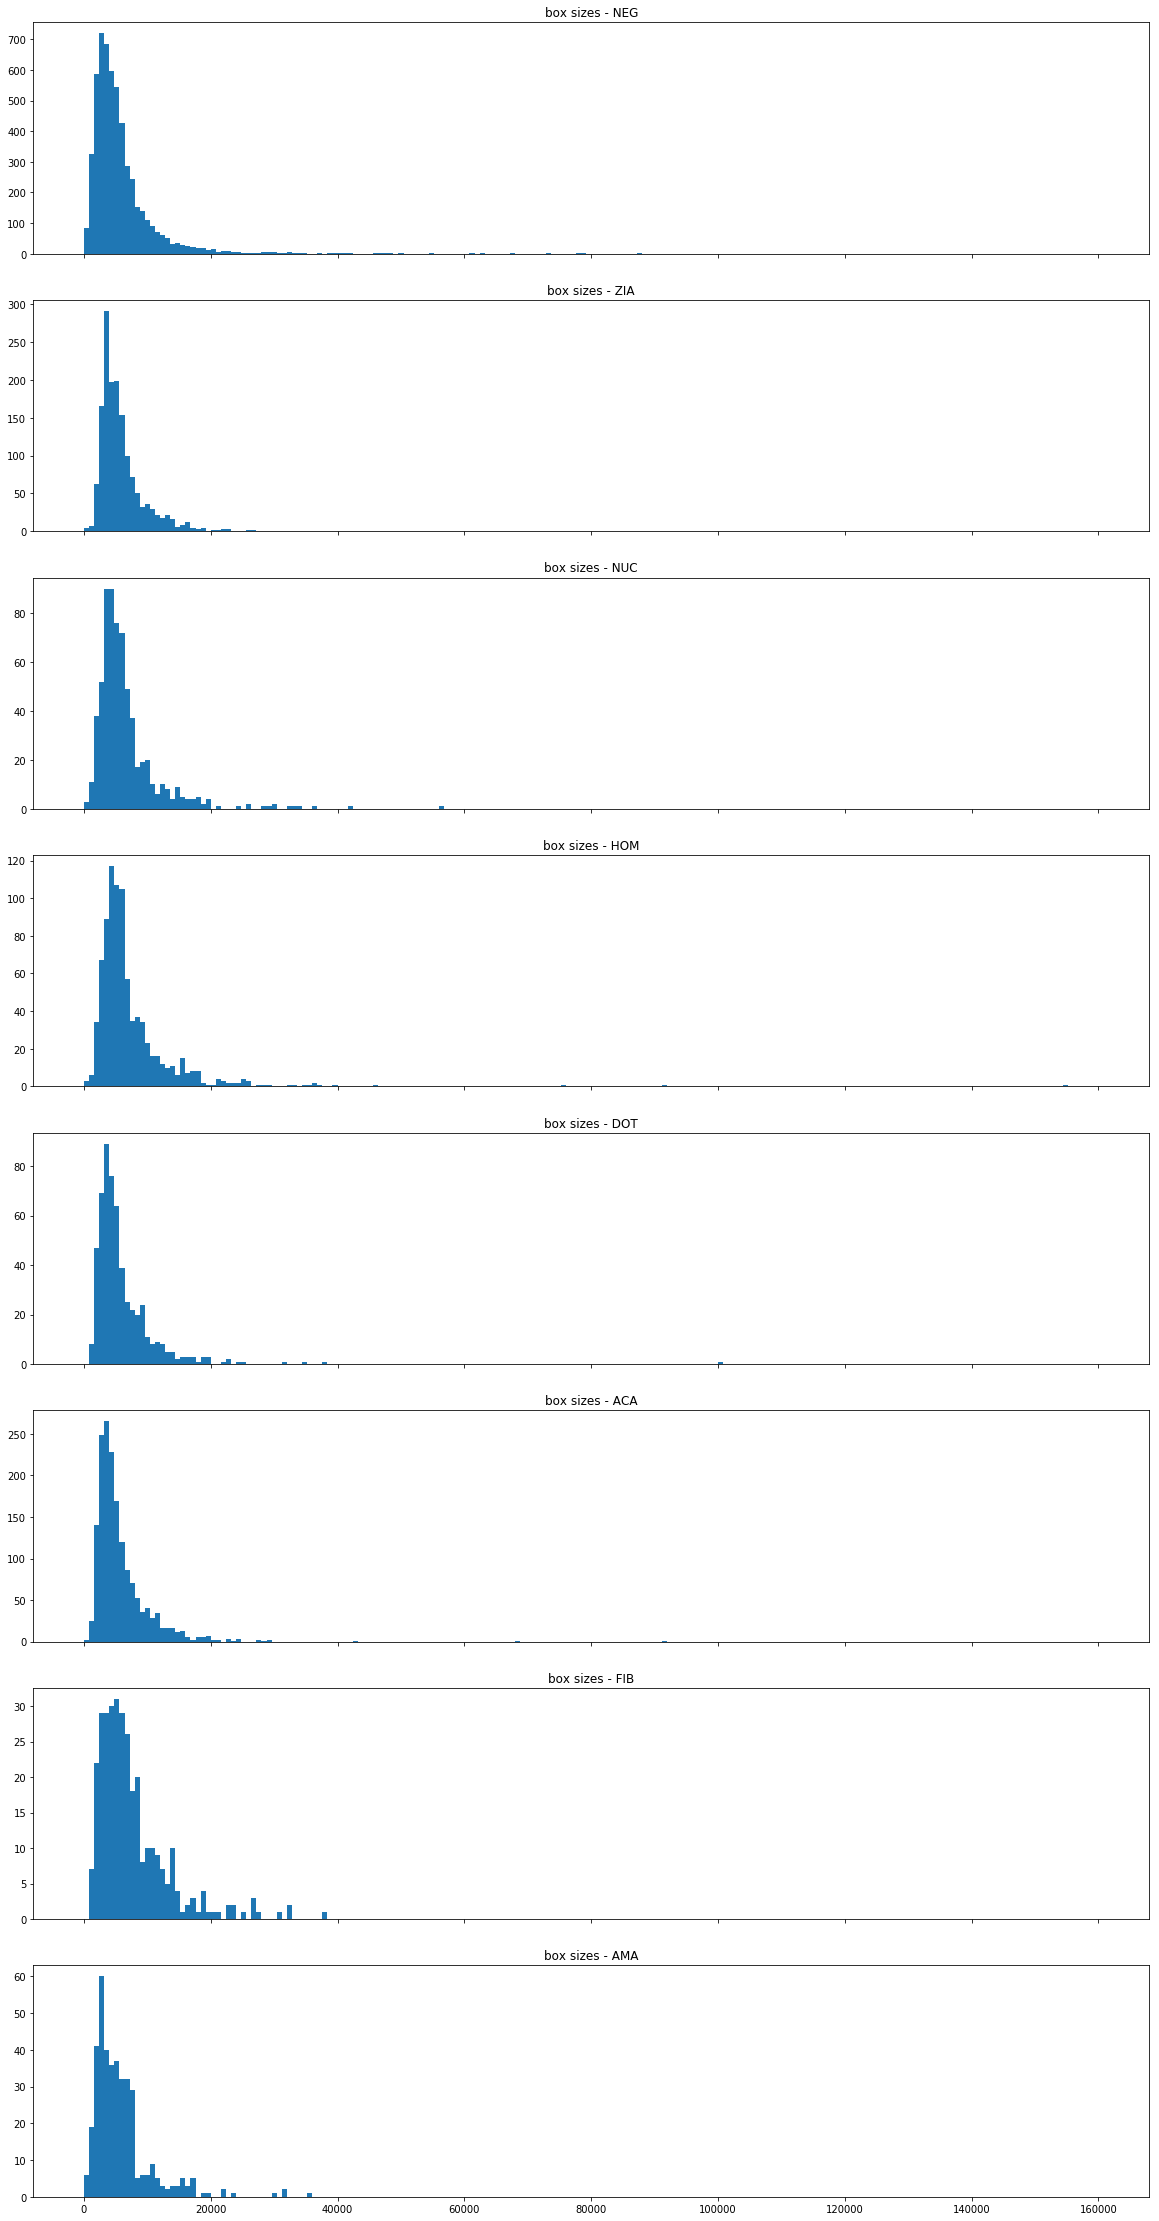

In [5]:
fig, axs = plt.subplots(nrows=len(df.type.unique()), sharex=True, figsize=(20,40))

for ax, cell_type in zip(axs, df.type.unique()):
    ax.set_title(f'box sizes - {cell_type}')
    ax.hist([size for sizes in df[df.type == cell_type].box_sizes for size in sizes], bins=200, range=(0,160000))

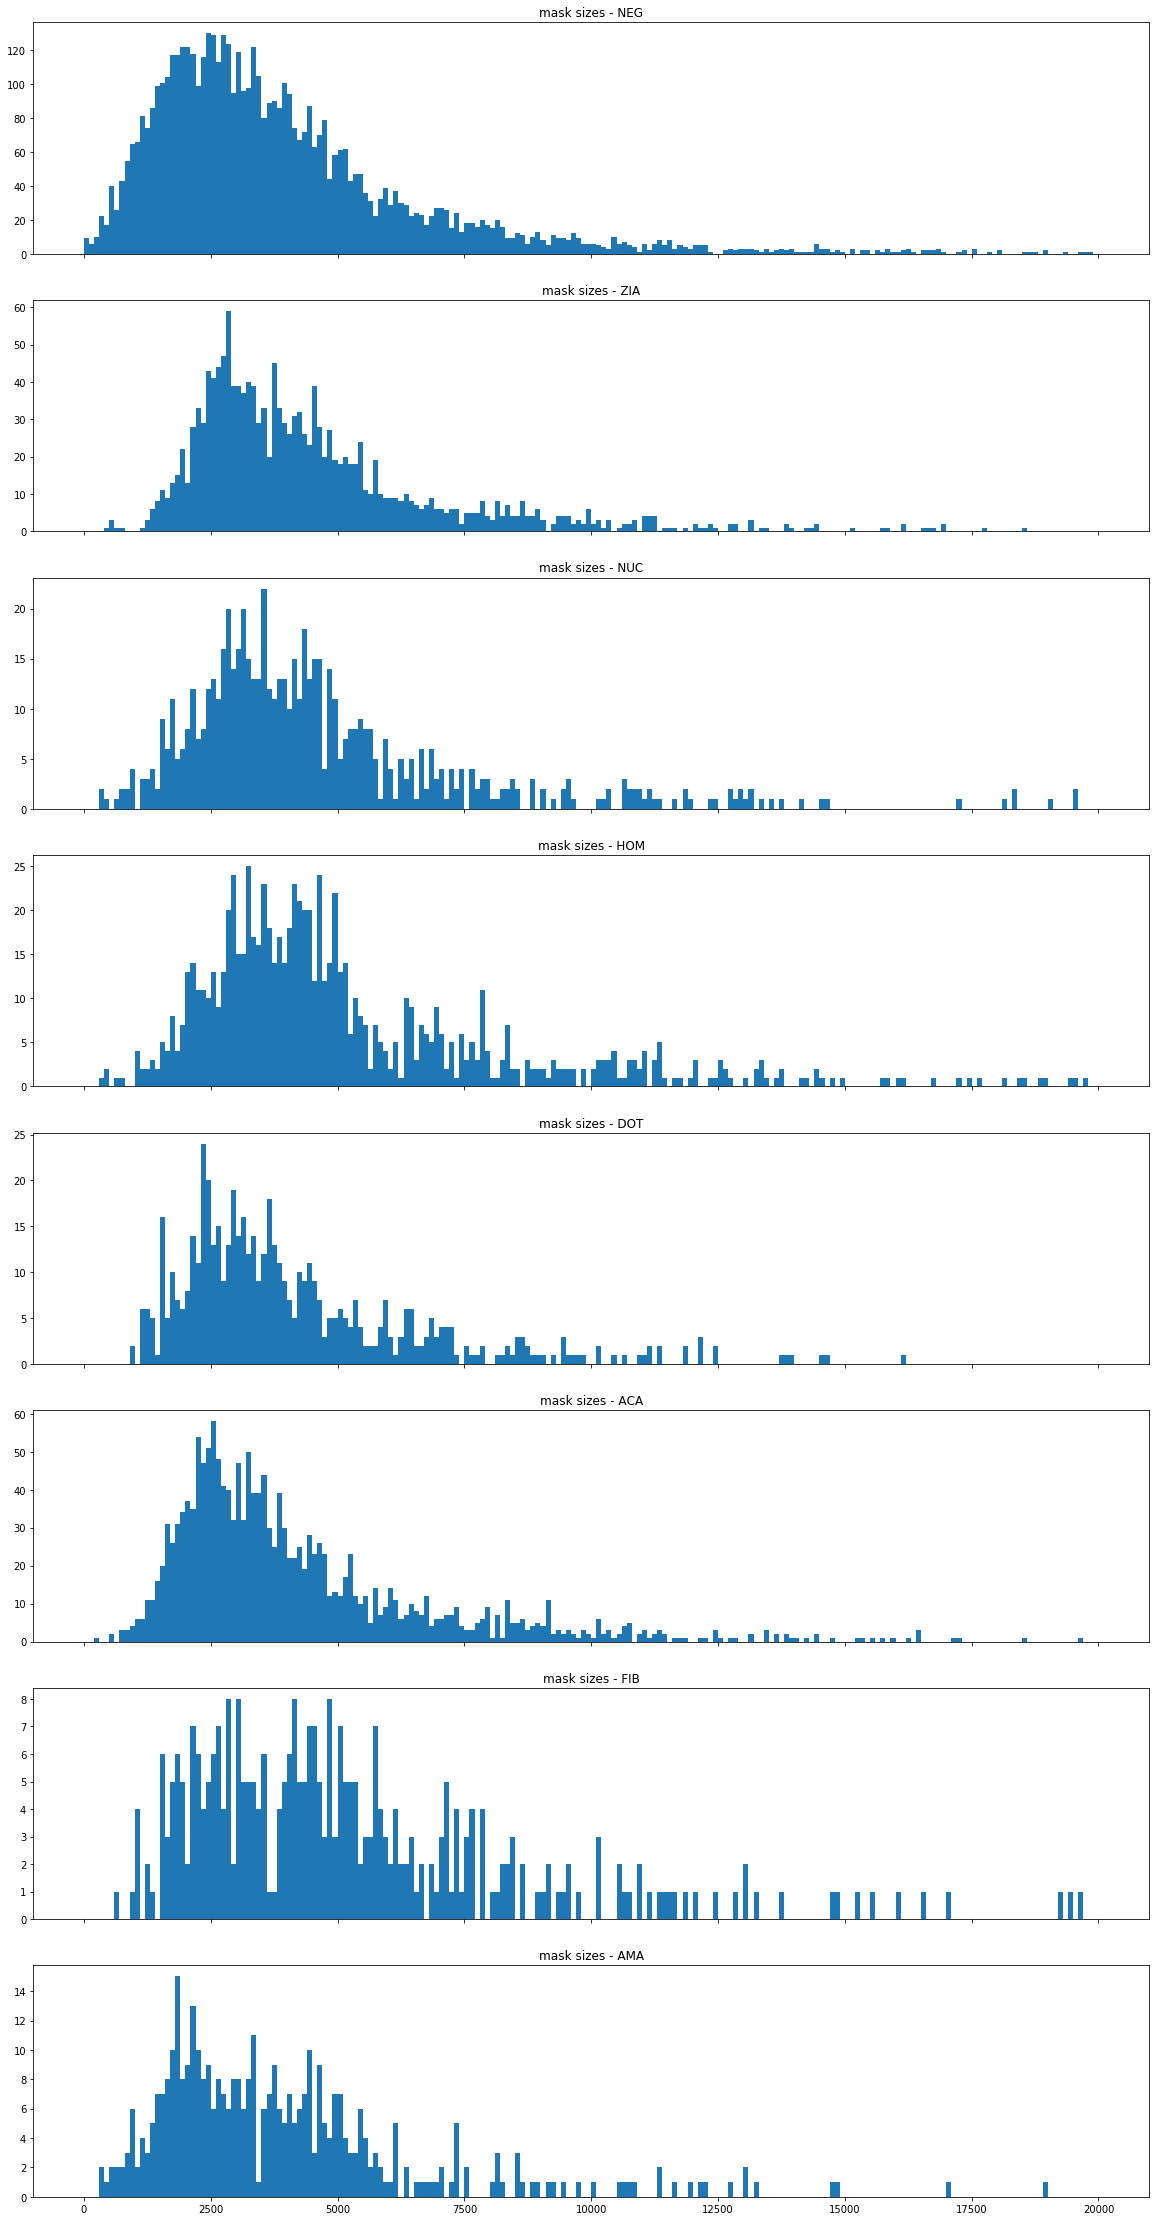

In [9]:
fig, axs = plt.subplots(nrows=len(df.type.unique()), sharex=True, figsize=(20,40))

for ax, cell_type in zip(axs, df.type.unique()):
    ax.set_title(f'mask sizes - {cell_type}')
    ax.hist([size for sizes in df[df.type == cell_type].mask_sizes for size in sizes], bins=200, range=(0,20000))

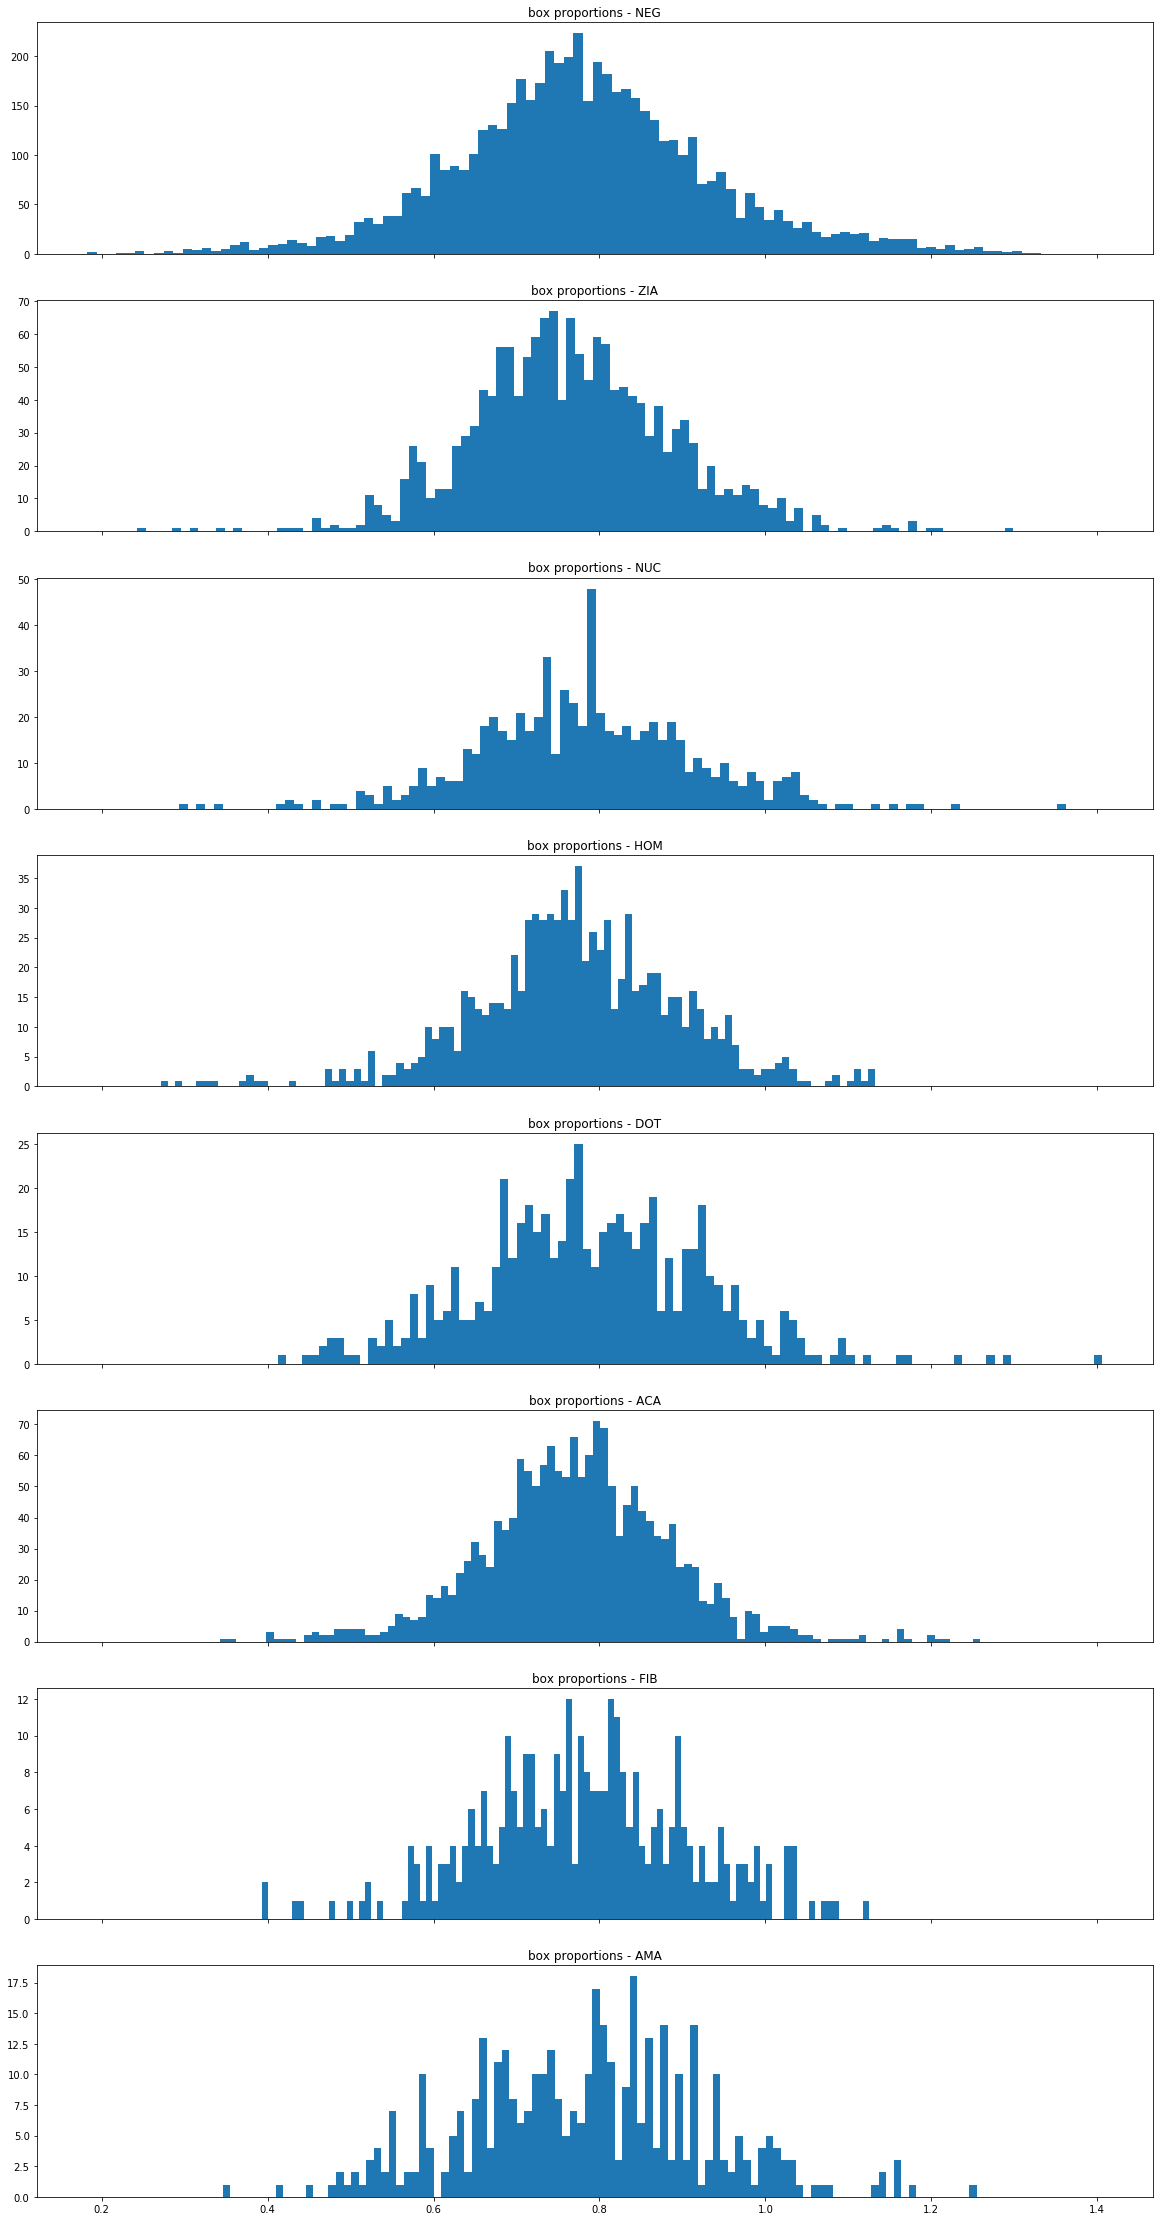

In [8]:
fig, axs = plt.subplots(nrows=len(df.type.unique()), sharex=True, figsize=(20,40))

for ax, cell_type in zip(axs, df.type.unique()):
    ax.set_title(f'box proportions - {cell_type}')
    ax.hist([size for sizes in df[df.type == cell_type].box_ratios for size in sizes], bins=100)

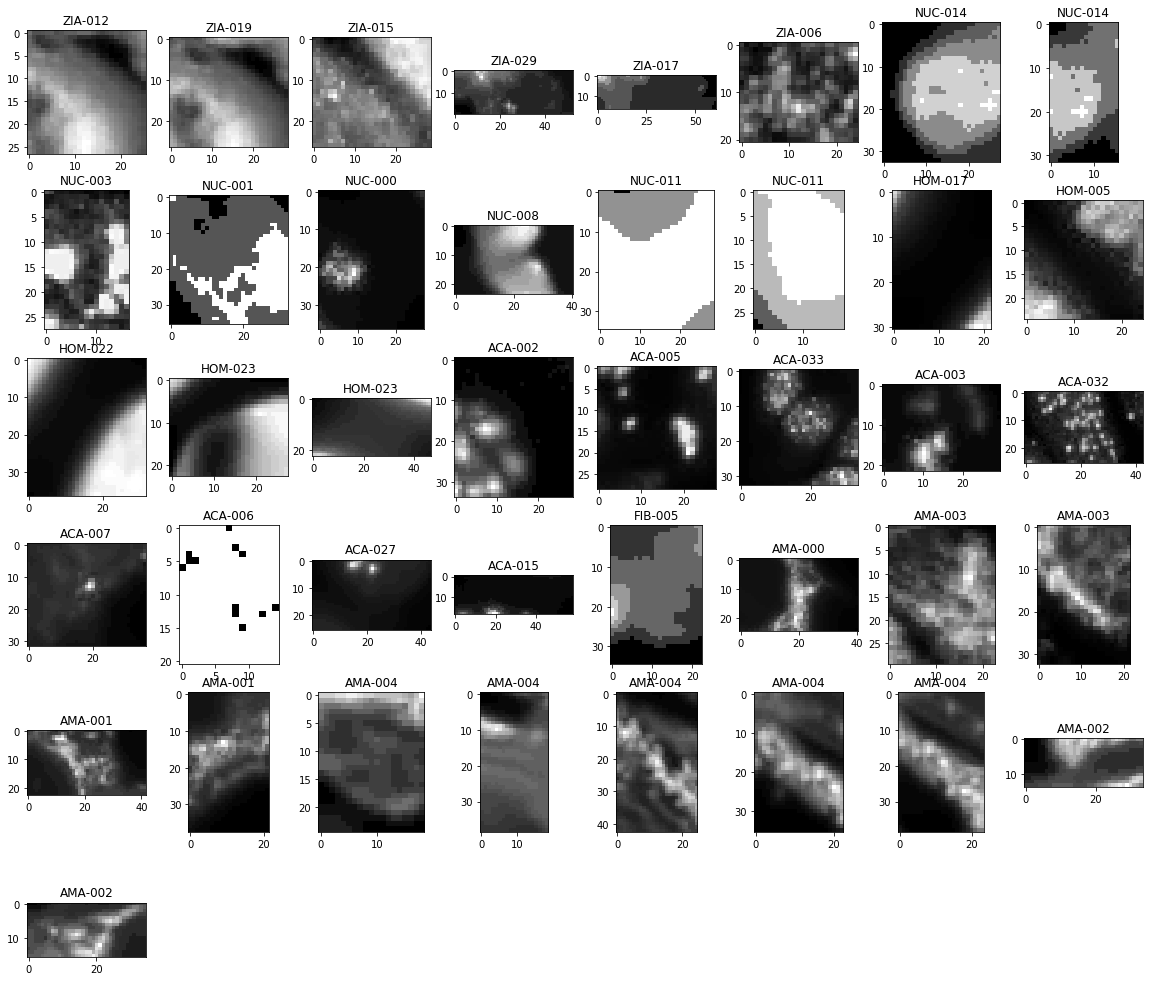

In [22]:
segmentations = [(SegmentationResult.load(file), file) for file in glob.glob('../data/segmented/ZIA*.npz')]
segmentations += [(SegmentationResult.load(file), file) for file in glob.glob('../data/segmented/NUC*.npz')]
segmentations += [(SegmentationResult.load(file), file) for file in glob.glob('../data/segmented/HOM*.npz')]
segmentations += [(SegmentationResult.load(file), file) for file in glob.glob('../data/segmented/DOT*.npz')]
segmentations += [(SegmentationResult.load(file), file) for file in glob.glob('../data/segmented/ACA*.npz')]
segmentations += [(SegmentationResult.load(file), file) for file in glob.glob('../data/segmented/FIB*.npz')]
segmentations += [(SegmentationResult.load(file), file) for file in glob.glob('../data/segmented/AMA*.npz')]

selected = [
        (segmentation.img[seg.slices], file)
        for segmentation, file in segmentations
        for seg in segmentation.segments
        if np.sum(seg.mask) < 900
    ]

display_grid(
    [img for img, _ in selected],
    ImagePlotter(),
    [os.path.basename(file).split('.')[0] for _, file in selected],
    cols=8
)

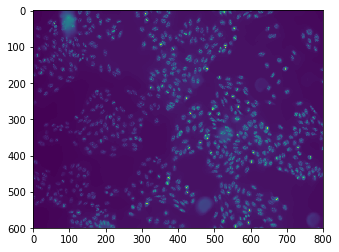

In [19]:
plt.imshow(SegmentationResult.load('../data/segmented/ACA-033.npz').img)

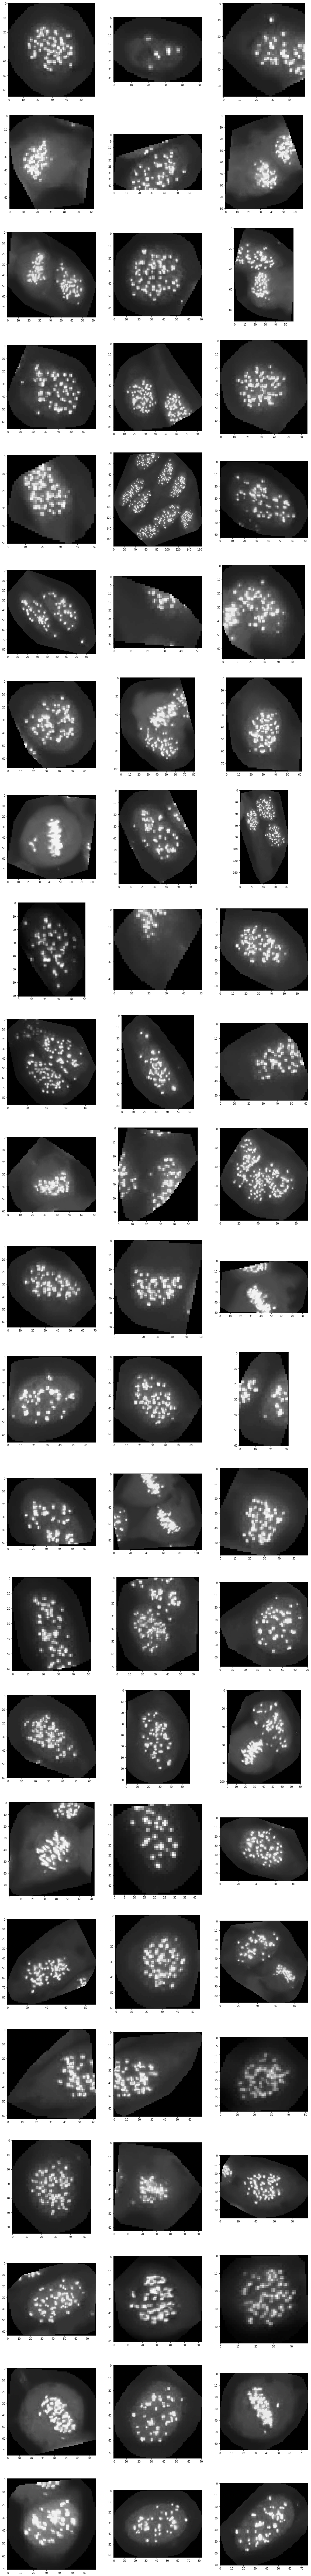

In [21]:
display_grid(
    list(SegmentationResult.load('../data/segmented/ACA-021.npz').cells_masked),
    ImagePlotter()
)